# Load and prepare the dataset

In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully unin

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.version.VERSION)

# Check for available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs are available: {gpus}")
else:
    print("No GPUs found.")


2024-09-08 17:33:03.311426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 17:33:03.311488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 17:33:03.312905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0
GPUs are available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset and split into train (70%), val (20%), and test (10%)
splits = ['train[:70%]', 'train[70%:90%]', 'train[90%:]']
(train_ds, val_ds, test_ds), info = tfds.load('plant_village', with_info=True, as_supervised=True, split=splits)

# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 64

# # Data augmentation function
# def augment(image, label):
#     image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_flip_up_down(image)
#     image = tf.image.random_brightness(image, max_delta=0.2)
#     image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
#     image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
#     image = tf.image.random_hue(image, max_delta=0.2)
#     image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
#     return image, label

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply augmentation only to the training dataset
# train_ds = train_ds.map(augment).map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Apply preprocessing to validation and test datasets
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Print dataset information
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/54303 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.VQ81QF_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='plant_village',
    full_name='plant_village/1.0.2',
    description="""
    The PlantVillage dataset consists of 54303 healthy and unhealthy leaf images
    divided into 38 categories by species and disease.
    
    NOTE: The original dataset is not available from the original source
    (plantvillage.org), therefore we get the unaugmented dataset from a paper that
    used that dataset and republished it. Moreover, we dropped images with
    Background_without_leaves label, because these were not present in the original
    dataset.
    
    Original paper URL: https://arxiv.org/abs/1511.08060 Dataset URL:
    https://data.mendeley.com/datasets/tywbtsjrjv/1
    """,
    homepage='https://arxiv.org/abs/1511.08060',
    data_dir=PosixGPath('/tmp/tmptfmv4dtftfds'),
    file_format=tfrecord,
    download_size=827.82 MiB,


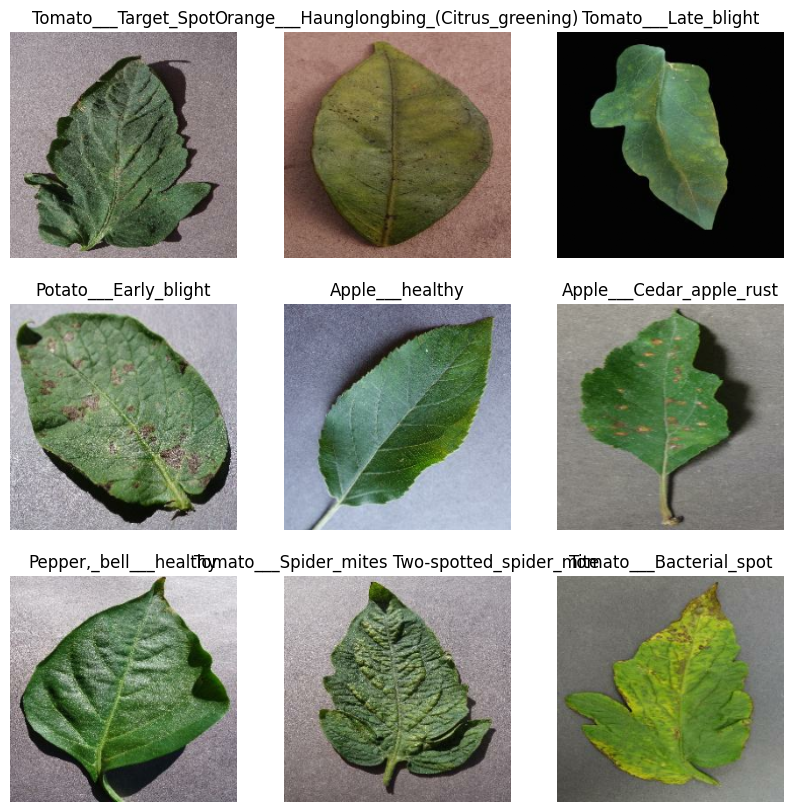

Class index: 0, Class name: Apple___Apple_scab
Class index: 1, Class name: Apple___Black_rot
Class index: 2, Class name: Apple___Cedar_apple_rust
Class index: 3, Class name: Apple___healthy
Class index: 4, Class name: Blueberry___healthy
Class index: 5, Class name: Cherry___healthy
Class index: 6, Class name: Cherry___Powdery_mildew
Class index: 7, Class name: Corn___Cercospora_leaf_spot Gray_leaf_spot
Class index: 8, Class name: Corn___Common_rust
Class index: 9, Class name: Corn___healthy
Class index: 10, Class name: Corn___Northern_Leaf_Blight
Class index: 11, Class name: Grape___Black_rot
Class index: 12, Class name: Grape___Esca_(Black_Measles)
Class index: 13, Class name: Grape___healthy
Class index: 14, Class name: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Class index: 15, Class name: Orange___Haunglongbing_(Citrus_greening)
Class index: 16, Class name: Peach___Bacterial_spot
Class index: 17, Class name: Peach___healthy
Class index: 18, Class name: Pepper,_bell___Bacterial_spot

In [ ]:
import matplotlib.pyplot as plt

# Function to display a batch of images and their labels
def visualize_sample_data(dataset, class_names, sample_size=9):
    plt.figure(figsize=(10, 10))

    for images, labels in dataset.take(1):
        for i in range(sample_size):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(class_names[labels[i].numpy()])
            plt.axis("off")
    plt.show()

# Retrieve class names
class_names = info.features['label'].names

# Visualize a sample of 9 images from the train dataset
visualize_sample_data(train_ds, class_names)

# Print class names with their corresponding indices
for index, class_name in enumerate(class_names):
    print(f'Class index: {index}, Class name: {class_name}')

# Build and train model

In [ ]:
# Load the EfficientNetB3 base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                  include_top=False,
                                                  weights='imagenet')

base_model.trainable = False  # Freeze the base model

# Define the model using Functional API
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)  # Ensure base_model runs in inference mode
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(38, activation='softmax')(x)

# Build the model
model = tf.keras.Model(inputs, outputs)

# print summary
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 38)                48678     
                                                                 
Total params: 2306662 (8.80 MB)
Trainable params: 48678 (190.15 KB)
Non-trainable params: 2257984 (8.61 MB)
______________________

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,  # Number of epochs to wait for improvement
    restore_best_weights=True,
    verbose=1
)

# Define ModelCheckpoint callback for both best model and latest model
model_checkpoint_best = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

model_checkpoint_latest = tf.keras.callbacks.ModelCheckpoint(
    'latest_model.keras',
    save_weights_only=True,
    mode='auto',
    verbose=1
)

# Define LearningRateScheduler callback with exponential decay
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    scheduler,
    verbose=1
)

# # Define TensorBoard callback for monitoring
# tensorboard = tf.keras.callbacks.TensorBoard(
#     log_dir='./logs',
#     histogram_freq=1,
#     write_graph=True,
#     write_images=False,
#     update_freq='epoch'
# )

# Train the model with the defined callbacks
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    callbacks=[early_stopping, model_checkpoint_best, model_checkpoint_latest, lr_scheduler]
)

# Save the entire model as a `.keras` zip archive
model.save('final_model.keras')



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/250
  3/594 [..............................] - ETA: 28s - loss: 3.9670 - accuracy: 0.0469  

I0000 00:00:1725816967.729801     303 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


594/594 [==============================] - ETA: 0s - loss: 0.5359 - accuracy: 0.8673
Epoch 1: val_accuracy improved from -inf to 0.92735, saving model to best_model.keras

Epoch 1: saving model to latest_model.keras
594/594 [==============================] - 43s 65ms/step - loss: 0.5359 - accuracy: 0.8673 - val_loss: 0.2485 - val_accuracy: 0.9274 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/250
594/594 [==============================] - ETA: 0s - loss: 0.1875 - accuracy: 0.9479
Epoch 2: val_accuracy improved from 0.92735 to 0.94107, saving model to best_model.keras

Epoch 2: saving model to latest_model.keras
594/594 [==============================] - 39s 65ms/step - loss: 0.1875 - accuracy: 0.9479 - val_loss: 0.1889 - val_accuracy: 0.9411 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/250
593/594 [============================>.] - ETA: 0s - loss: 0.1365 - accuracy: 0.9618
Epoc

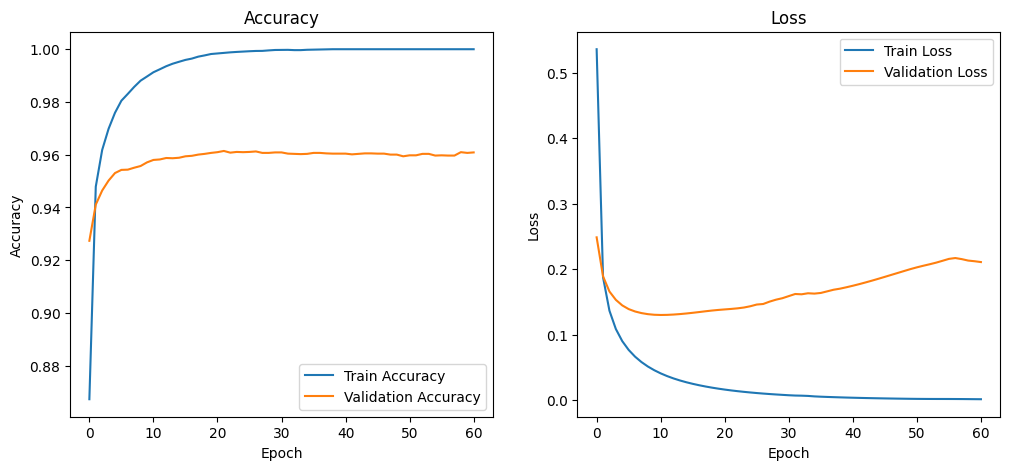

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)

# Convert model to tflite

In [ ]:
import tensorflow as tf

# Load the .keras model
loaded_model = tf.keras.models.load_model('final_model.keras')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model to the working directory
save_path = 'plant_disease_model.tflite'
try:
    with open(save_path, 'wb') as f:
        f.write(tflite_model)
    print(f"Model successfully saved to {save_path}")
except Exception as e:
    print(f"Failed to save the model: {e}")


Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 108, Total Ops 180, % non-converted = 60.00 %
 * 108 ARITH ops

- arith.constant:  108 occurrences  (f32: 106, i32: 2)



  (f32: 10)
  (f32: 35)
  (f32: 17)
  (f32: 1)
  (f32: 1)
  (f32: 4)
  (f32: 1)


Model successfully saved to plant_disease_model.tflite


In [ ]:
# import tensorflow as tf

# # Load the .keras model
# loaded_model = tf.keras.models.load_model('final_model.keras')

# # Convert the model to TensorFlow Lite with Float16 quantization
# converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

# # Set optimizations to default (enables quantization)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# # Specify the Float16 quantization
# converter.target_spec.supported_types = [tf.float16]

# # Convert the model
# tflite_model = converter.convert()

# # Save the TFLite model to the working directory
# save_path = 'plant_disease_model_float16.tflite'
# try:
#     with open(save_path, 'wb') as f:
#         f.write(tflite_model)
#     print(f"Float16 quantized model successfully saved to {save_path}")
# except Exception as e:
#     print(f"Failed to save the quantized model: {e}")


# Evaluate the tflite model

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='plant_disease_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

def evaluate_model(ds):
    correct = 0
    total = 0

    for images, labels in ds:
        # Iterate through the batch
        for i in range(len(images)):
            # Convert the image to PIL format for preprocessing
            image = images[i].numpy().astype(np.float32)
            image = np.expand_dims(image, axis=0)

            label = labels[i].numpy()

            # Set the input tensor
            interpreter.set_tensor(input_details[0]['index'], image)

            # Run inference
            interpreter.invoke()

            # Get the result
            output_data = interpreter.get_tensor(output_details[0]['index'])
            prediction_idx = np.argmax(output_data, axis=1)[0]

            # print(f"Prediction: {prediction_idx}, Actual: {label}")

            if prediction_idx == label:
                correct += 1
            total += 1

    # Calculate accuracy
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100:.2f}%")

evaluate_model(test_ds)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 177, 'shape': array([ 1, 38], dtype=int32), 'shape_signature': array([-1, 38], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Accuracy: 96.28%


# Run Inference

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the .keras model
model = tf.keras.models.load_model('final_model.keras')

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='plant_disease_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess_image(image_path, img_size=224):
    # Load and preprocess the image
    image = Image.open(image_path)
    image = image.resize((img_size, img_size))
    image = np.array(image).astype(np.float32) / 255.0
    # Add batch dimension
    image = np.expand_dims(image, axis=0)
    return image

def predict_tflite(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Set the tensor for input
    interpreter.set_tensor(input_details[0]['index'], image)

    # Run inference
    interpreter.invoke()

    # Get the result
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data, axis=1)

    return prediction

def predict_float(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Run inference
    output_data = model.predict(image)

    # Get the result
    prediction = np.argmax(output_data, axis=1)

    return prediction

In [ ]:
# Example usage
image_path = '/kaggle/input/plantvillage-dataset/color/Orange___Haunglongbing_(Citrus_greening)/000945ae-3cf5-48c2-86a2-a3f1e777f2c7___CREC_HLB 7640.JPG'  # Replace with your image path
result = predict_tflite(image_path)
print(f'Predicted class: {result}')

# Example usage:
result = predict_float(image_path)
print("Predicted class:", result)

Predicted class: [15]
1/1 [==============================] - 1s 1s/step
Predicted class: [15]
